In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\rupok\Desktop\Data Set\Real estate.csv")

In [3]:
df.head(4)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8


In [4]:
df=df.drop(['No' ,'X5 latitude','X6 longitude'] ,axis=1)

In [5]:
df.head(4)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.3 KB


In [7]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]

In [8]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    object 
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.3+ KB


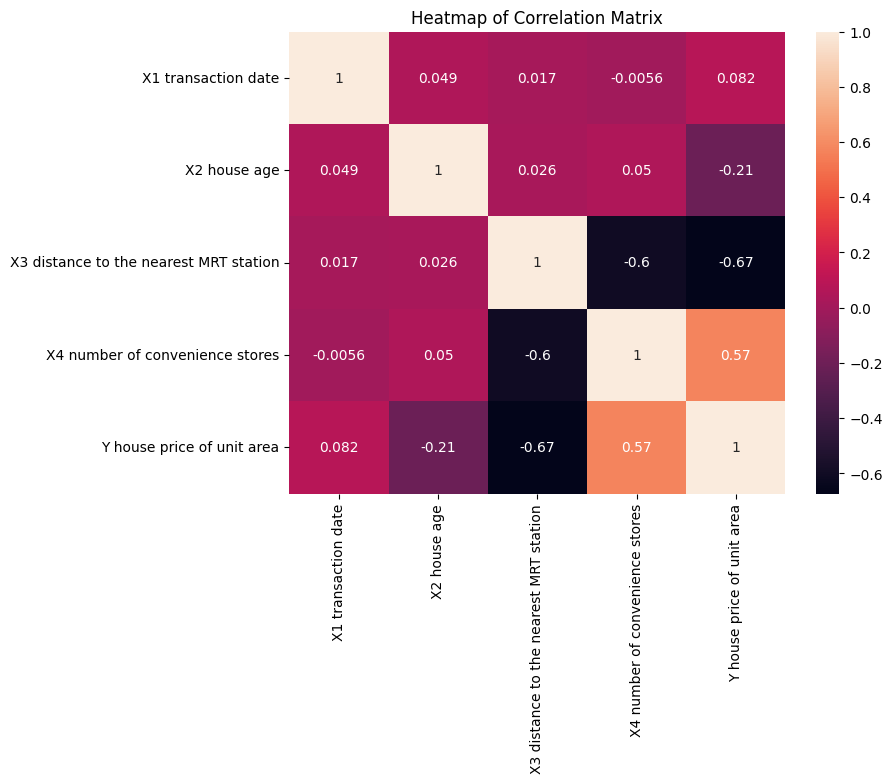

In [10]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [11]:
x=df[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']]
y=df['Y house price of unit area']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.7,random_state=3)

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [15]:
model.fit(x_train,y_train)


LinearRegression()

In [16]:
model.predict(x_test)

array([39.70583284, 43.93282532, 41.5167233 , 47.60388172, 34.5536687 ,
       34.35321047, 18.3525796 , 44.8521359 , 50.30999271, 47.14270222,
       50.68232666, 31.00898876, 49.12303035, 39.96279156, 48.29740003,
       42.37254091, 42.64232007, 34.0074041 , 39.09540108,  5.57674702,
       50.56781207, 29.57172794, 27.72944325, 23.56564524, 36.68490188,
       41.30587512, 34.96400094, 40.56041599, 26.46731788, 47.53901583,
       42.37973414, 44.92155693, 53.21798749, 18.3267555 , 45.18943573,
       39.23229254, 44.16646278, 45.9558499 , 50.56781207, 43.79530928,
       47.84634836, 43.58800016, 35.00367908, 40.73797523, 38.46109708,
       45.39444189, 36.47178339, 17.74973835, 18.37840369, 28.85899157,
       46.42011712, 38.19634139, 47.60388172, 41.22655834, 33.2608761 ,
       19.65562774, 33.57331598, 33.70745985, 36.78904218, 34.87078255,
       38.06090728, 50.59363617, 43.13008205,  2.59054192, 34.92243074,
       47.84836727, 31.93956298, 39.68092429, 43.94159622, 23.78

In [17]:
model.score(x,y)

0.5513973497580109

In [18]:
from sklearn.preprocessing import PolynomialFeatures


In [19]:
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_train)
x_test_poly = polynomial_features.transform(x_test)

In [20]:

model.fit(x_poly,y_train)

LinearRegression()

In [21]:
model.predict(x_test_poly)

array([38.04745366, 41.47293036, 41.43389812, 54.3780443 , 30.71753043,
       36.28592422, 17.29882883, 44.50350819, 57.4421632 , 53.14429678,
       54.45637381, 29.43904781, 52.82972603, 49.28899026, 47.54591339,
       41.32917457, 42.39668781, 27.54804815, 39.49313502, 15.22526447,
       57.87011826, 29.8953757 , 21.59319028, 19.66122686, 31.94550626,
       42.75561186, 38.04136134, 47.15589954, 24.41529647, 51.970935  ,
       43.90830571, 47.11150775, 58.15801257, 17.29564485, 45.29765554,
       38.83920478, 42.67893527, 45.4538844 , 57.87011826, 44.155895  ,
       51.90841891, 45.55931588, 34.26961415, 41.26739965, 45.15101223,
       45.5936432 , 40.80384165, 16.99065481, 17.30239057, 26.60051529,
       48.09423787, 34.96090522, 54.3780443 , 42.86338548, 31.63088469,
       18.16713165, 29.08072751, 27.70444129, 37.78758544, 33.09619494,
       38.14313103, 57.97441257, 56.06598478, 25.79135495, 33.20585293,
       52.72527773, 27.36356219, 35.82678977, 55.60249235, 21.04

In [28]:
model.score(x_poly,y_train)


0.6281792464745162